In [632]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from pandas import DataFrame
import math
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [638]:
# households and average household expenditures for williamsburg zipcodes
# taken from http://www.point2homes.com/US/Neighborhood/NY/Brooklyn/Williamsburg-Demographics.html
households = 68787
total_expend = 40514

In [647]:
# estimate regional GDP using household expenditures as a proxy
gdp = households * total_expend
print 'Estimated GDP of Williamsburg is:',gdp

Estimated GDP of Williamsburg is: 2786836518


### couldn't get the cell below to work using a dictionary

In [707]:
# breakouts of relevant spend categories
# these are at the total city level for NYC - brooklyn or zipcode level data is unavailable
# taken from http://www.nycedc.com/economic-data/may-2014-economic-snapshot
# categories = {health: .056, 
#             entertain : .042, 
#             apparel : .039, 
#             dining : .132, 
#             other : .058}

# #categories = health, entertain, apparel, dining, other

# my_dict = {health: 0, 
#         entertain : 0, 
#         apparel : 0, 
#         dining : 0, 
#         other : 0}

# for i in categories.iteritems():
#     cat_spend = i * gdp
#     my_dict.update(i, cat_spend)
#     print cat_spend

In [708]:
# health = .056
# entertain = .042 
# apparel = .039 
# dining = .132 
# other = .058

#categories = [health, entertain, apparel, dining, other]
categories = [.056, .042, .039, .132, .058]
my_list = []

for i in categories:
    cat_spend = i*gdp
    my_list.append(cat_spend)
    print cat_spend


156062845.008
117047133.756
108686624.202
367862420.376
161636518.044


In [714]:
# total relevant gdp is just the sum of all relevant categories
gdp_est = sum(my_list)
print 'Estimated GDP is: $',int(gdp_est)

Estimated GDP is: $ 911295541


## Need to determine the percentage of all brooklyn (or williamsburg) commercial properties within our radius for better 'sample_area' variable value

In [710]:
# just made this up. sample_area should be the percentage of commerical properties in brooklyn that exist within our radius
sample_area = .05 

# calculate area gdp
local_gdp = sample_area * gdp_est
local_gdp
print 'The estimated size of our economy around the Bedford Station is: $', int(local_gdp)

The estimated size of our economy around the Bedford Station is: $ 45564777


In [711]:
# create impact calculation function
# this function returns the estimated monthly decrease in the economy of the impacted area
# current form shows that the impact of the closure is zero in the same month that the closure finishes
def impact_calc(duration, gdp):
    dur_m = duration * 12 # duration in months if we want that
    yr_range = np.arange(1,dur_m+1) # create range of years
    g = 1/(dur_m*2.0)
    loss = [-.5*log((g*i)+.5) for i in yr_range]
    est_gdp = [(1-k)*local_gdp for k in loss]
    impact = [local_gdp - j for j in est_gdp]
    return impact

In [712]:
# run the function to estimate impact of 3-year shutdown
impact_calc(3, local_gdp)

[15167334.303809408,
 14559767.937245563,
 13967984.313629959,
 13391184.175286204,
 12828627.481316768,
 12279627.69850884,
 11743546.764096223,
 11219790.627676718,
 10707805.294171944,
 10207073.301737972,
 9717110.5784880593,
 9237463.6301640719,
 8767707.0178038031,
 8307441.0902442634,
 7856289.9411758333,
 7413899.5645801499,
 6979936.1858740225,
 6554084.7490498051,
 6136047.5426347777,
 5725542.9494590387,
 5322304.3070814908,
 4926078.8673250228,
 4536626.8447537646,
 4153720.5451221317,
 3777143.5658631101,
 3406690.0615864173,
 3042164.0683447719,
 2683378.8811142668,
 2330156.4795382172,
 1982326.9975126535,
 1639728.2326572686,
 1302205.1921260282,
 969609.67157390714,
 641799.86441709846,
 318639.99880815297,
 0.0]

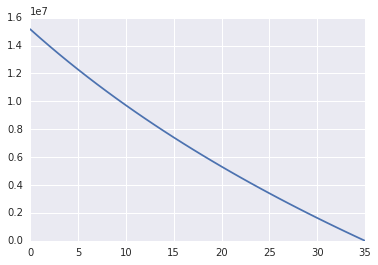

In [713]:
plt.plot(blob)